In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("Bengaluru_House_Data.csv")
df.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [3]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [6]:
df2 = df.drop(['area_type', 'availability','balcony','society',], axis=1)
df2.head(10)

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
5,Whitefield,2 BHK,1170,2.0,38.00
6,Old Airport Road,4 BHK,2732,4.0,204.00
7,Rajaji Nagar,4 BHK,3300,4.0,600.00
8,Marathahalli,3 BHK,1310,3.0,63.25
9,Gandhi Bazar,6 Bedroom,1020,6.0,370.00


In [7]:
df2.dropna(inplace=True)
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [11]:
df2["bhk"]=df2["size"].apply(lambda x :int(x.split(" ",)[0]))
# isme ek bhk ke naamka col banaya based on size colum to split the value by space ad taking the the first index of it 

In [ ]:
df2.drop(["BHK"], axis=1, inplace=True)


KeyError: "['BHK'] not found in axis"

In [15]:
df2.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [16]:
# we gotta remve the range 
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True



# iska ulta matlab u want to get the values that has rnage 
df2[~df2["total_sqft"].apply(is_float)]


,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [17]:
df3=df2.copy()

In [18]:
# range hai toh unn dono ka avg lekrar value dddaal de aur agar unit conversion waal hai toh ...ignore thr row 
def range_to_val(x):
    variable=x.split("-")
    if len(variable)==2:
        return (float(variable[0])+ float(variable[1]))/2
    try:
        return float(x)
    except:
        return None
    
    
df3["total_sqft"]=df3["total_sqft"].apply(range_to_val)
df3.head(3)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3


In [19]:
df3.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [20]:
df4=df3.copy()

In [21]:
df4["price_per_sqft"]=df4["price"]*100000/df4["total_sqft"]
df4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [24]:
df4.location=df4.location.apply(lambda x:x.strip())
location_stats=df4.groupby("location")["location"].agg("count")
location_stats

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Immadihalli                                      1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
                                                  ..
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
white field,kadugodi                               1
whitefiled                                         1
Name: location, Length: 1293, dtype: int64

In [27]:
location_stats=df4.groupby("location")["location"].agg("count").sort_values(ascending=False)
location_stats

location
Whitefield                            535
Sarjapur  Road                        392
Electronic City                       304
Kanakpura Road                        266
Thanisandra                           236
                                     ... 
poornaprajna layout                     1
pavitra paradise                        1
near Ramanashree California resort      1
mvj engineering college                 1
1Kasavanhalli                           1
Name: location, Length: 1293, dtype: int64

In [28]:
# toh kon kon se  jagah ka less than one data point hai 
location_stats_less_than_10=location_stats[location_stats<=10]
location_stats_less_than_10

location
Kalkere                               10
Sadashiva Nagar                       10
BTM 1st Stage                         10
Basapura                              10
Gunjur Palya                          10
                                      ..
poornaprajna layout                    1
pavitra paradise                       1
near Ramanashree California resort     1
mvj engineering college                1
1Kasavanhalli                          1
Name: location, Length: 1052, dtype: int64

In [30]:
df4.location=df4.location.apply(lambda x : "other" if x in location_stats_less_than_10 else x)

In [31]:
len(df4.location.unique())

242

In [34]:
# abhi samaj 1000 sqft me 2 bhk hia ..which is 500 per bedroom and ur client says that the bhk size of each room  
# is around 300 there ye 1000 waala data point will create a probelm i prediction  so u need to remove them 
df4[df4.total_sqft/df4.bhk <300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [36]:
df4.shape

(13246, 7)

In [37]:
df5=df4[~(df4.total_sqft/df4.bhk<300)]

In [38]:
df5.shape

(12502, 7)

In [39]:
df5.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [40]:
def remove_pps(df):
    df_out=pd.DataFrame()
    for key, subdf in df.groupby("location"):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out


df6=remove_pps(df5)
df6.shape

(10241, 7)

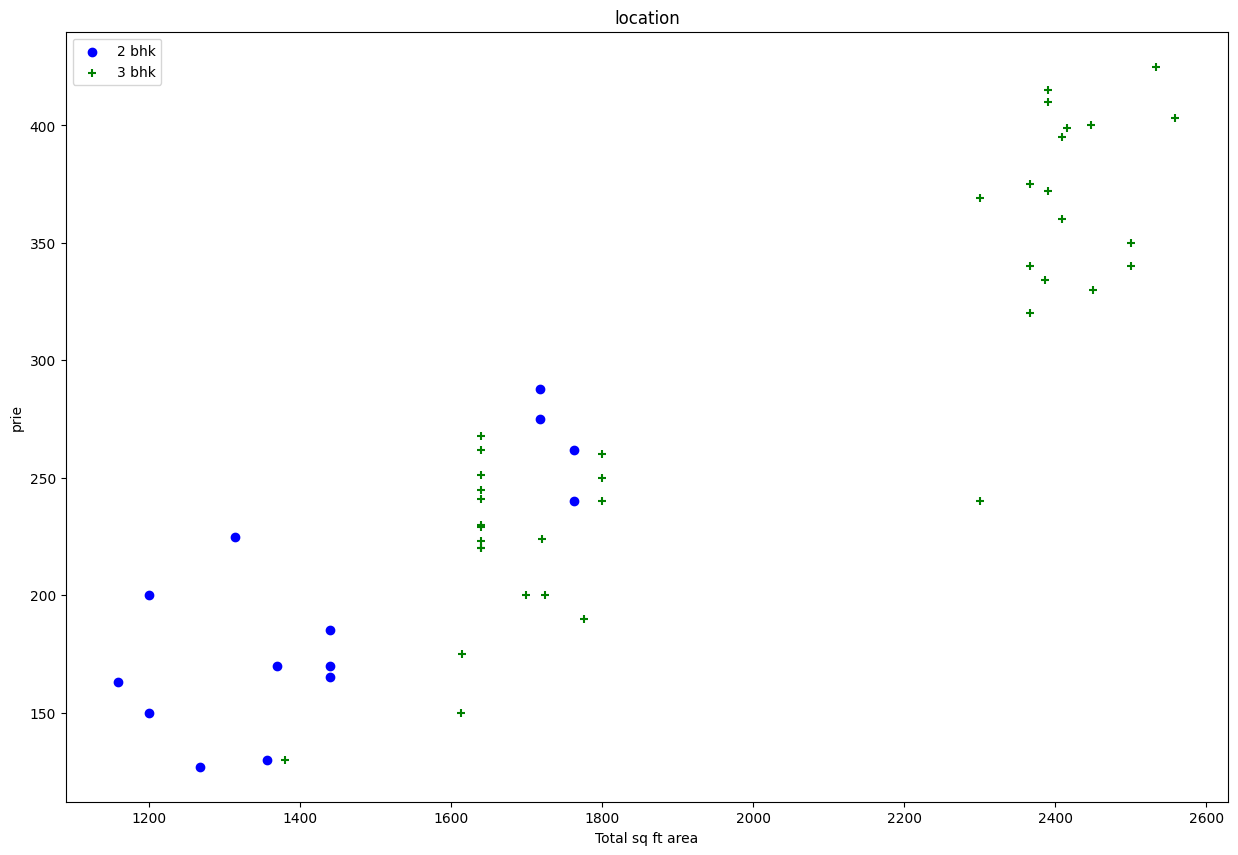

In [42]:
# kaahi kaahi pe same location me 2 bhk ka price zyad hia than 4 bhk 
# toh we need to see that data points 
def plot_scatter(df, location):
    bhk2=df[(df.location==location) &(df.bhk==2)]
    bhk3=df[(df.location==location) &(df.bhk==3)]
    
    
    plt.figure(figsize=(15, 10))
    plt.scatter(bhk2.total_sqft,bhk2.price, color="blue", label="2 bhk")
    plt.scatter(bhk3.total_sqft,bhk3.price, marker="+", color="green", label="3 bhk")
    plt.xlabel("Total sq ft area")
    plt.ylabel("prie")
    plt.title("location")
    plt.legend()
    
    
plot_scatter(df6,"Rajaji Nagar")

In [ ]:
def remove_outlier_bhk(df):
    exclude_indicies=np.array([])
    for location, location_df in df.groupby("location"):
        bhk_stats={}
        for bhk ,bhk_df in location_df.groupby("bhk"):
            bhk_stats[bhk]={
                "mean": np.mean(bhk_df.price_per_sqft),
                "std": np.std(bhk_df.price_per_sqft),
                "count": bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby("bhk"):
            stats=bhk_stats.get(bhk-1)
            if  stats and stats["count"]>5:
                exclude_indicies=np.append(exclude_indicies, bhk_df[bhk_df.price_per_sqft<(stats["mean"])].index.values)
    
    return df.drop(exclude_indicies,axis="index")


df7=remove_outlier_bhk(df6)
df7.shape

(7329, 7)

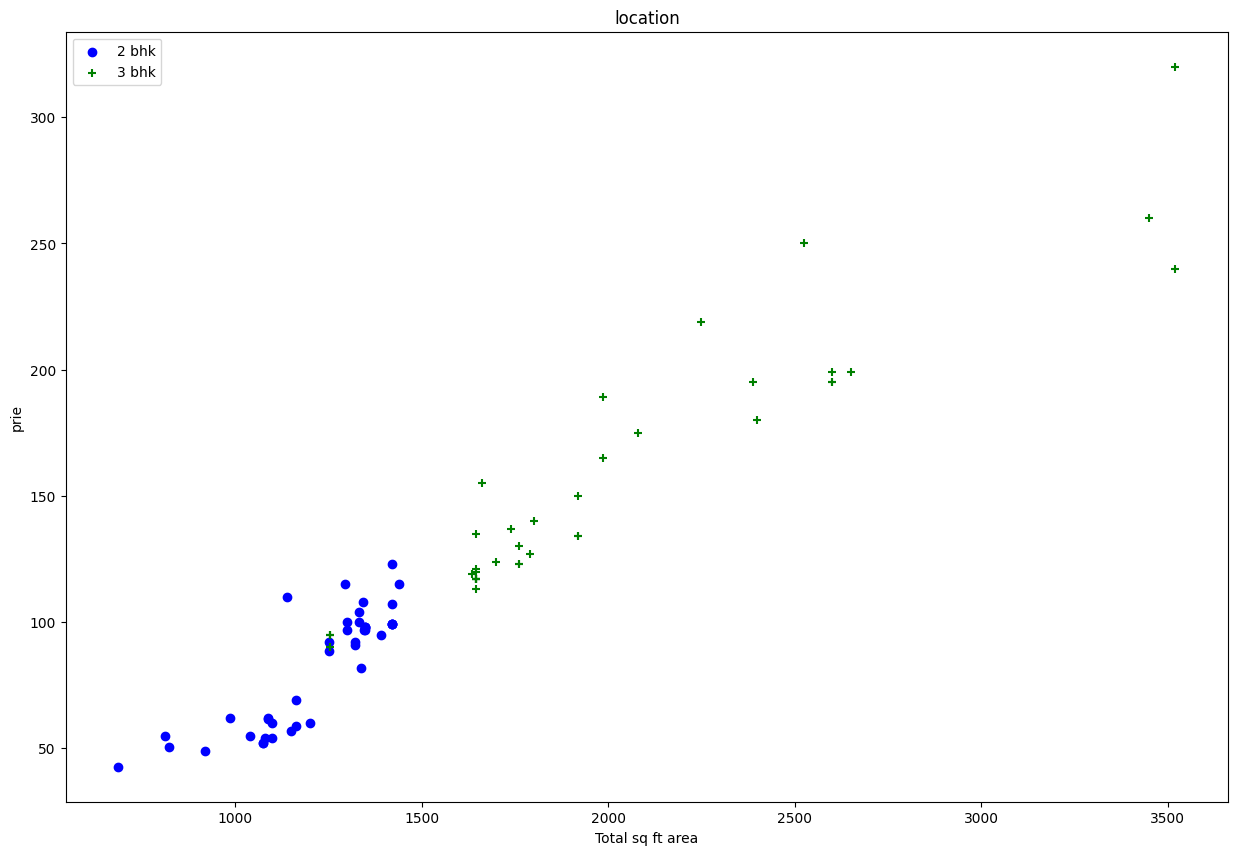

In [45]:
plot_scatter(df7,"Hebbal")

In [46]:
df7.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [47]:
df7[df7.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


In [50]:
df7[df7.bath>df7.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [51]:
df8=df7[df7.bath<df7.bhk+2]
df8.shape

(7251, 7)

In [52]:
df9=df8.drop(["price_per_sqft","size"],axis="columns")
df9.head(10)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
5,1st Block Jayanagar,2750.0,4.0,413.0,4
6,1st Block Jayanagar,2450.0,4.0,368.0,4
8,1st Phase JP Nagar,1875.0,3.0,167.0,3
9,1st Phase JP Nagar,1500.0,5.0,85.0,5
10,1st Phase JP Nagar,2065.0,4.0,210.0,3


In [55]:
dummies=pd.get_dummies(df9.location).astype(int)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
df10=pd.concat([df9,dummies.drop("other",axis="columns")],axis="columns")
df10.head(5)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
df11=df10.drop("location",axis="columns")
df11.head(4)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
df11.shape

(7251, 245)

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error,r2_score
import joblib
import numpy as np

In [ ]:
X=df11.drop("price",axis="columns")
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
y=df11.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2,random_state=10)


In [67]:
linear_reg=LinearRegression()
linear_reg.fit(X_train , y_train)

LinearRegression()

In [68]:
linear_reg.score(X_test,y_test)

0.8452277697874295

In [70]:
linear_pred=linear_reg.predict(X_test)
mean_squared_error(y_test , linear_pred)

783.2659935250222

In [71]:
r2_score(y_test , linear_pred)

0.8452277697874295

In [72]:
rfr_model=RandomForestRegressor()
rfr_model.fit(X_train,y_train)

RandomForestRegressor()

In [73]:
rfr_model.score(X_test,y_test)

0.797882022613734

In [74]:
rfr_pred=rfr_model.predict(X_test)
mean_squared_error(y_test ,rfr_pred)

1022.8717267257139

In [75]:
r2_score(y_test ,rfr_pred)

0.797882022613734

In [76]:
rfr_model2=RandomForestRegressor(max_depth=10, min_samples_leaf=4,min_samples_split=2 , n_estimators=8)
rfr_model2.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=4, n_estimators=8)

In [77]:
rfr_model2.score(X_test,y_test)

0.7779025247421245

In [78]:
rfr_pred2=rfr_model2.predict(X_test)
mean_squared_error(y_test ,rfr_pred2)

1123.9832841998414

In [79]:
from sklearn.tree import DecisionTreeRegressor
dt_model=DecisionTreeRegressor()


In [80]:
from sklearn.model_selection import GridSearchCV

In [81]:
para_grid_dt = {
    "max_depth": [3, 5, 10, None],  
    "min_samples_split": [2, 5, 10], 
    "min_samples_leaf": [1, 2, 5, 10],  
    "max_features": ["sqrt", "log2", None]  
}
grid_dt=GridSearchCV(dt_model, para_grid_dt,cv=2)
grid_dt.fit(X_train, y_train)


GridSearchCV(cv=2, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 5, 10, None],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10]})

In [82]:
grid_dt.score(X_test,y_test)

0.7602597870541818

In [101]:
def predict_price(location,sqft,bath,bhk):
    loc_index=np.where(X.columns==location)[0][0]
    
    
    x=np.zeros(len(X.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=bhk
    if loc_index>=0:
        x[loc_index]=1
        
    return linear_reg.predict([x])[0]

In [89]:
predict_price("1st Phase JP Nagar",1000,2,2)

c:\Users\mypc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(83.49904677174472)

In [91]:
predict_price("1st Phase JP Nagar",1000,3,3)

c:\Users\mypc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(86.80519395201073)

In [92]:
predict_price("Indira Nagar",1000,2,2)

c:\Users\mypc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(181.2781548400693)

In [93]:
predict_price("Indira Nagar",1000,3,3)

c:\Users\mypc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(184.58430202033537)

In [ ]:

def predict_price_another(location, sqft, bath, bhk):
    x = np.zeros(len(X.columns))  
    
 
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    
#    OHE
    if location in X.columns:
        loc_index = X.columns.get_loc(location)
        x[loc_index] = 1  

  
    x_df = pd.DataFrame([x], columns=X.columns)

    return linear_reg.predict(x_df)[0]  


In [107]:
predict_price_another("1st Phase JP Nagar",1000,2,2)


np.float64(83.49904677174472)

In [108]:
predict_price_another("1st Phase JP Nagar",1000,2,3)

np.float64(81.72616900749925)

In [111]:
import pickle
with open("bhp_linear_model.pickle","wb") as f:
    pickle.dump(linear_reg,f)

In [110]:
import json

columns = {
    "data_columns": list(X.columns)  # Convert the index object to a list
}

with open("columns_linear.json", "w") as f:
    f.write(json.dumps(columns))